In [1]:
# importamos las librerías necesarias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
from wordcloud import WordCloud

# Análisis del archivo STEAM GAMES

In [2]:
# iniciamos el análisis del archivo steam_games
df_steam = pd.read_parquet('CleanData/steam_games.parquet')
df_steam.head()

,id,app_name,title,price,developer,release_date,tag_1980s,tag_1990's,tag_2.5D,tag_2D,...,spec_Single-player,spec_Stats,spec_Steam Achievements,spec_Steam Cloud,spec_Steam Leaderboards,spec_Steam Trading Cards,spec_Steam Turn Notifications,spec_Steam Workshop,spec_SteamVR Collectibles,spec_Valve Anti-Cheat enabled
0,761140,Lost Summoner Kitty,Lost Summoner Kitty,4.99,Kotoshiro,2018-01-04,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,643980,Ironbound,Ironbound,0.00,Secret Level SRL,2018-01-04,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,670290,Real Pool 3D - Poolians,Real Pool 3D - Poolians,0.00,Poolians.com,2017-07-24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,767400,弹炸人2222,弹炸人2222,0.99,彼岸领域,2017-12-07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,772540,Battle Royale Trainer,Battle Royale Trainer,3.99,Trickjump Games Ltd,2018-01-04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_steam.duplicated(subset= 'id').sum()

0

## Análisis de Precios

In [4]:
df_steam['price'].value_counts()

price
4.99      5107
9.99      3590
2.99      3186
0.99      2479
1.99      2268
          ... 
27.49        1
139.92       1
6.00         1
16.06        1
160.91       1
Name: count, Length: 137, dtype: int64

<Axes: >

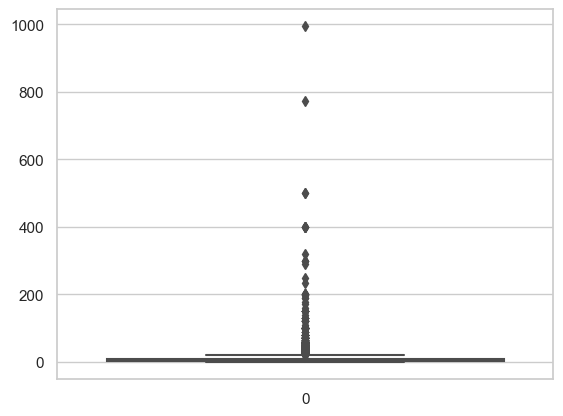

In [5]:
sns.boxplot(df_steam['price'])      # vemos que hay outliers

(0.0, 3000.0)

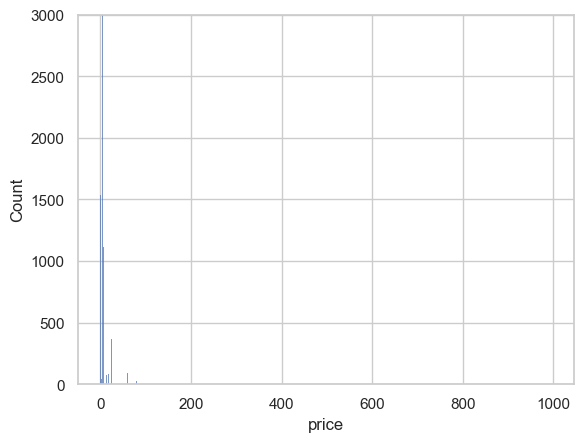

In [6]:
sns.histplot(df_steam['price'])
plt.ylim(0,3000)

In [7]:
df_steam['price'].describe()

count    28899.000000
mean         8.837150
std         15.709419
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [8]:
max_price = df_steam['price'].max()                 # Máximo precio
median_price = np.mean(df_steam['price'])           # Precio correspondiente a la mediana (Q2)
q1 = np.quantile(df_steam['price'], q=0.25)         # Precio correspondiente al primer cuartil (Q1)
q3 = np.quantile(df_steam['price'], q=0.75)         # Precio correspondiente al tercer cuartil (Q3)
iqr = q3 - q1                                       # Rango intercuartil
lim_sup = q3 + 1.5*iqr                              # Límite superior de outliers. Valores por encima de lim_sup son considerados outliers

In [9]:
juego_max = df_steam.loc[df_steam['price'].idxmax(), 'app_name']
print(f'El precio máximo es {max_price} y corresponde al juego {juego_max}')

El precio máximo es 995.0 y corresponde al juego Strata Spaces VR – Professional Edition Upgrade


In [10]:
print('Los juegos con precio outlier son:\n')
juegos_outliers = df_steam[df_steam['price'] > lim_sup]['app_name'].tolist()
juegos_outliers

Los juegos con precio outlier son:



['SNOW - All Access Legend Pass',
 'SNOW - Lifetime Pack',
 'RACE - The WTCC Game',
 'Guild Wars Trilogy',
 'Train Simulator: Colton & Northern Route Add-On',
 'SEGA Mega Drive and Genesis Classics',
 'Mafia II',
 "Sid Meier's Civilization® V",
 'Call of Duty®: Black Ops',
 'Warhammer 40,000: Dawn of War II: Retribution',
 'Frozen Synapse',
 'Warhammer 40,000: Space Marine',
 'Call of Duty®: Modern Warfare® 3',
 'Crusader Kings II',
 'Total War: Shogun 2 - Fall of the Samurai',
 'Resident Evil: Operation Raccoon City',
 'Dungeons & Dragons Online® Menace of the Underdark™',
 'Spiral Knights: Guardians Armor Pack',
 'Sleeping Dogs',
 'Gotham City Impostors Free to Play: Ultimate Impostor Kit',
 'Carrier Command: Gaea Mission',
 '3D-Coat V4.8',
 'Rocksmith™',
 'APB Reloaded Urban Survival Pack',
 'Call of Duty®: Black Ops II',
 'Painkiller Hell & Damnation: Satan Claus DLC',
 'DmC: Devil May Cry',
 '3DMark',
 'Omerta - City of Gangsters - The Bulgarian Colossus DLC',
 'RPG Maker VX Ace -

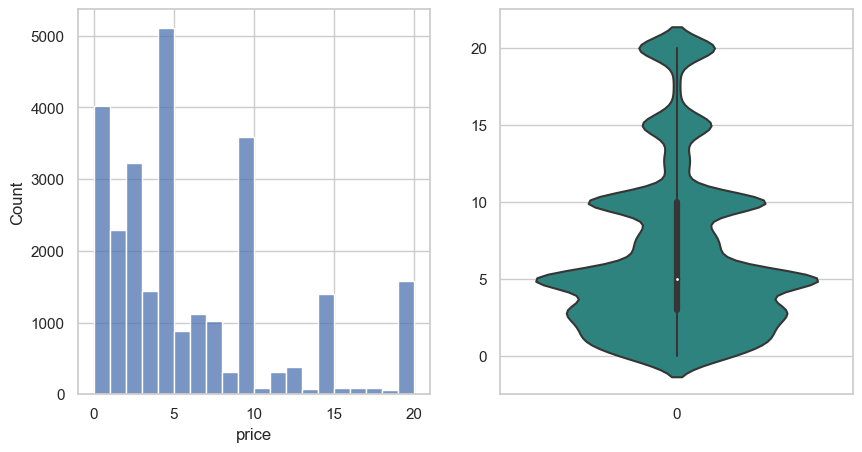

In [11]:
# grafiquemos la distribución de precios sin los outliers
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))

ax1 = sns.histplot(df_steam[df_steam['price'] < lim_sup]['price'], bins=20, ax= ax1, palette='viridis')
ax2 = sns.violinplot(df_steam[df_steam['price'] < lim_sup]['price'], ax= ax2, palette='viridis')

## Análisis de Developers

In [12]:
df_steam['developer'].value_counts()

developer
Ubisoft - San Francisco                     1259
SmiteWorks USA, LLC                          813
Dovetail Games                               253
KOEI TECMO GAMES CO., LTD.                   232
Paradox Development Studio                   156
                                            ... 
Salus Games                                    1
Class of  2016-2017                            1
Pirotexnik                                     1
ElVery333,Raquel Covelo Suarez,ATopeCode       1
Bidoniera Games                                1
Name: count, Length: 11011, dtype: int64

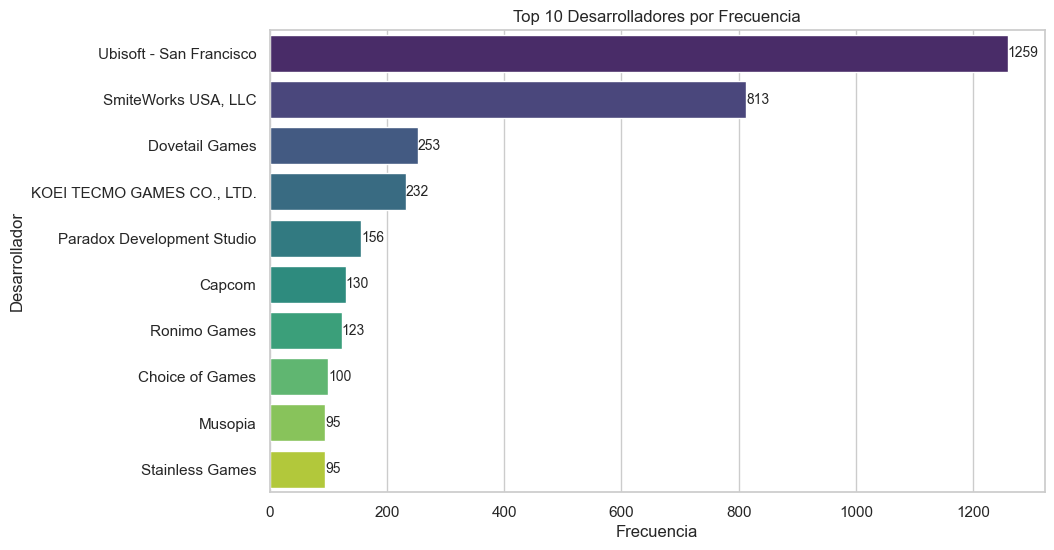

In [13]:
# veamos cuales son los 10 desarrolladores con más juegos

dev_data = df_steam['developer'].value_counts().reset_index()
dev_data.rename(columns= {'count': 'Frecuencia'}, inplace=True)

plt.figure(figsize=(10,6))

histograma = sns.barplot(data=dev_data.head(10), y='developer', x='Frecuencia', palette="viridis")

for index, value in enumerate(dev_data.head(10)['Frecuencia']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top 10 Desarrolladores por Frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')

plt.show()


In [14]:
# veamos los desarrolladores con los juegos más caros
developers_outliers = df_steam[df_steam['price'] > lim_sup]['developer'].value_counts().reset_index()
developers_outliers.rename(columns= {'count': 'Frecuencia'}, inplace=True)

In [15]:
developers_outliers

,developer,Frecuencia
0,"SmiteWorks USA, LLC",78
1,"KOEI TECMO GAMES CO., LTD.",33
2,MAGIX Software GmbH,27
3,Dovetail Games,25
4,Carenado,24
...,...,...
837,"Sonic Team,Hardlight",1
838,Appeal,1
839,TT Games,1
840,Torus Games,1


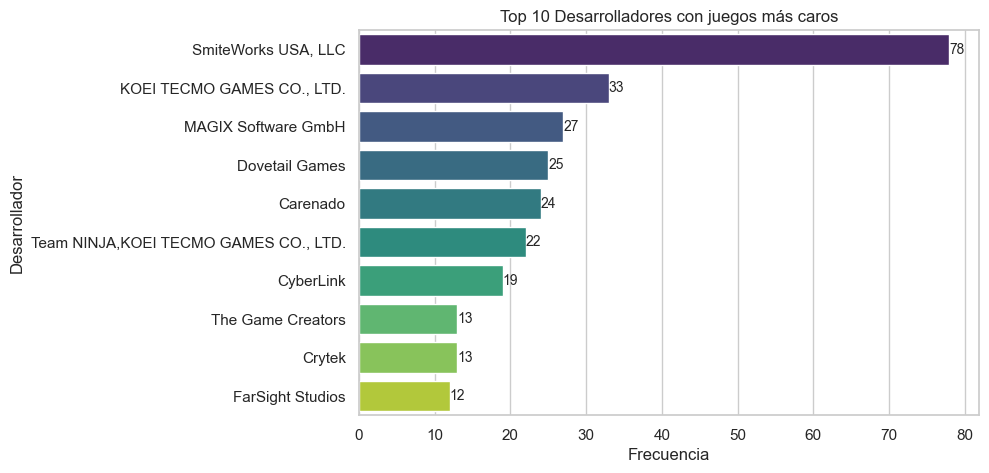

In [16]:
plt.figure(figsize=(8,5))

histograma = sns.barplot(data=developers_outliers.head(10), y='developer', x='Frecuencia', palette="viridis")

for index, value in enumerate(developers_outliers.head(10)['Frecuencia']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top 10 Desarrolladores con juegos más caros')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')

plt.show()

In [17]:
# veamos ahora los desarrolladores con los juegos más baratos, con precios menores a la mediana

developers_cheap = df_steam[df_steam['price'] < median_price]['developer'].value_counts().reset_index()
developers_cheap.rename(columns= {'count': 'Frecuencia'}, inplace=True)
developers_cheap

,developer,Frecuencia
0,Ubisoft - San Francisco,1121
1,"SmiteWorks USA, LLC",556
2,"KOEI TECMO GAMES CO., LTD.",151
3,Ronimo Games,119
4,Capcom,105
...,...,...
8117,RDavis,1
8118,Vladimir Alekseev,1
8119,Enrick Lambert,1
8120,Frostbullet,1


In [18]:
developers_cheap.loc[9,'developer'] = 'Relic Entertainment'

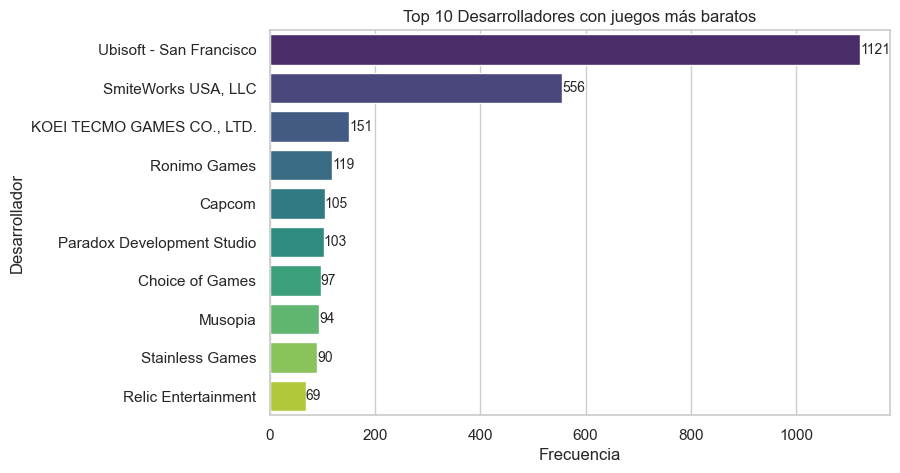

In [19]:
plt.figure(figsize=(8,5))

histograma = sns.barplot(data=developers_cheap.head(10), y='developer', x='Frecuencia', palette="viridis")

for index, value in enumerate(developers_cheap.head(10)['Frecuencia']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top 10 Desarrolladores con juegos más baratos')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')

plt.show()

## Análisis de Release Date

In [20]:
df_steam['release_date'].dtype

dtype('<M8[ns]')

In [21]:
df_steam['release_date'].dt.year.value_counts().reset_index()

,release_date,count
0,2017,9280
1,2016,6729
2,2015,4788
3,2014,2751
4,2013,1462
5,2012,1295
6,2011,555
7,2010,409
8,2009,324
9,2008,196


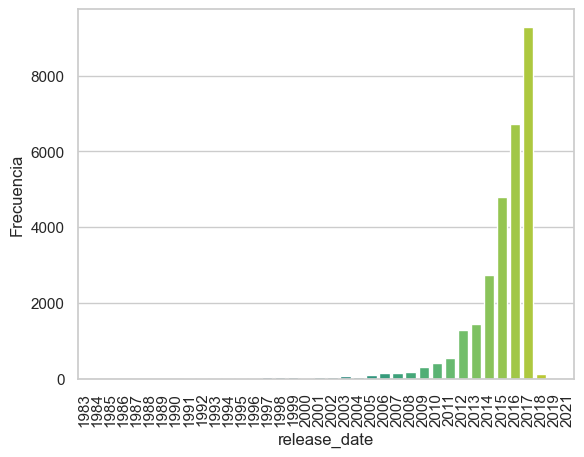

In [22]:
# veamos como se fue desarrollando en el tiempo el desarrollo de videojuegos
sns.barplot(data= df_steam['release_date'].dt.year.value_counts().reset_index().rename(columns={'count': 'Frecuencia'}), 
            x='release_date', y='Frecuencia', palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [23]:
df_steam['release_date'].dt.year

0        2018
1        2018
2        2017
3        2017
4        2018
         ... 
28894    2018
28895    2018
28896    2018
28897    2018
28898    2017
Name: release_date, Length: 28899, dtype: int32

<Axes: >

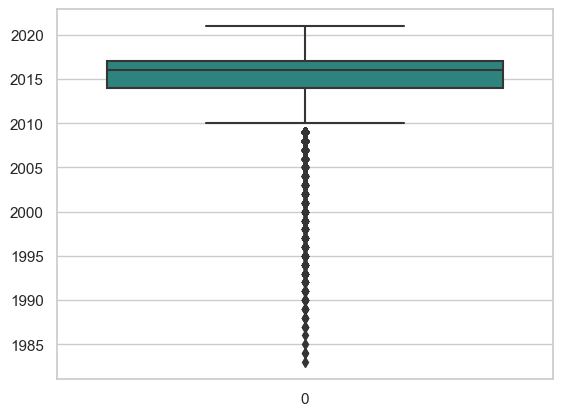

In [24]:
sns.boxplot(df_steam['release_date'].dt.year, palette='viridis')

In [25]:
# generamos la columna Año
df_steam['Año'] = df_steam['release_date'].dt.year

<Axes: xlabel='Año', ylabel='price'>

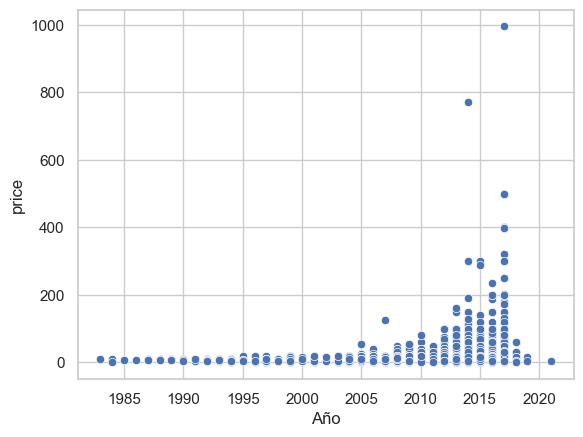

In [26]:
sns.set(style="whitegrid")
sns.scatterplot(data= df_steam, x= 'Año', y= 'price', palette='viridis')

## Análisis de géneros

In [27]:
# cargamos un dataframe con la columna genres expandida
df_genres = pd.read_parquet('CleanData/genres.parquet')
df_genres.head()

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
0,Action,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04
1,Casual,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04
3,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04
4,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04


In [28]:
# generamos la columna Año
df_genres['Año'] = df_genres['release_date'].dt.year

In [29]:
# veamos la frecuencia de aparición de cada género
df_genres_frec = df_genres['genres'].value_counts().reset_index().rename(columns={'count': 'Frecuencia'})
df_genres_frec.head(10)

,genres,Frecuencia
0,Indie,15828
1,Action,11276
2,Casual,8274
3,Adventure,8230
4,Strategy,6932
5,Simulation,6687
6,RPG,5474
7,Free to Play,2014
8,Early Access,1460
9,Sports,1255


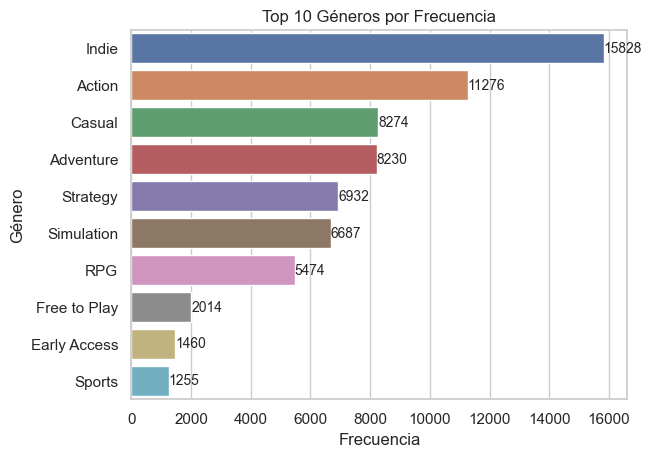

In [30]:
# veamos el top 10 de géneros
sns.barplot(data= df_genres_frec.head(10), x= 'Frecuencia', y= 'genres')
for index, value in enumerate(df_genres_frec.head(10)['Frecuencia']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top 10 Géneros por Frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Género')

plt.show()

In [31]:
# veamos cómo se comportan los géneros en cuanto al promedio de precios por género
df_genres_grouped_price = df_genres.groupby('genres').agg({'price': 'mean'}).reset_index().sort_values(by='price', ascending=False)
df_genres_grouped_price.head(10)

,genres,price
17,Chess,192.490000
7,Animation &amp; Modeling,54.297104
115,Video Production,49.071339
37,Education,45.331825
11,Audio Production,38.887727
3,Accounting,37.848571
97,Software Training,31.119307
114,Utilities,30.598006
31,Design &amp; Illustration,28.838457
74,Photo Editing,25.639610


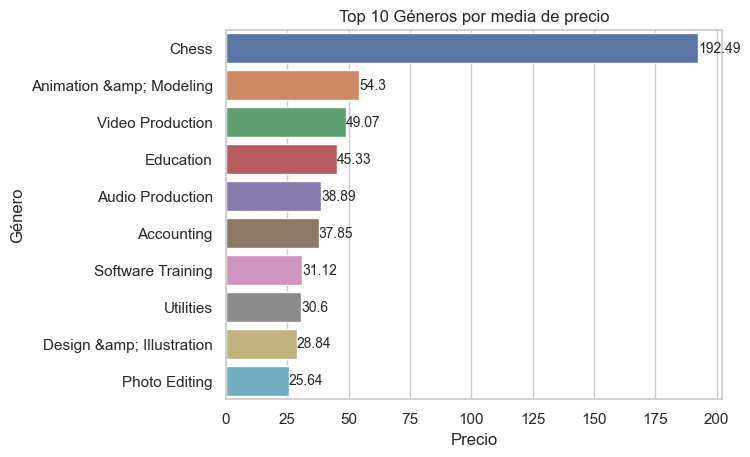

In [32]:
# primero analizamos los géneros más caros
sns.barplot(data= df_genres_grouped_price.head(10), x= 'price', y= 'genres')
for index, value in enumerate(df_genres_grouped_price.head(10)['price']):
    plt.text(value, index, str(round(value,2)), ha='left', va='center', fontsize=10)

plt.title('Top 10 Géneros por media de precio')
plt.xlabel('Precio')
plt.ylabel('Género')

plt.show()

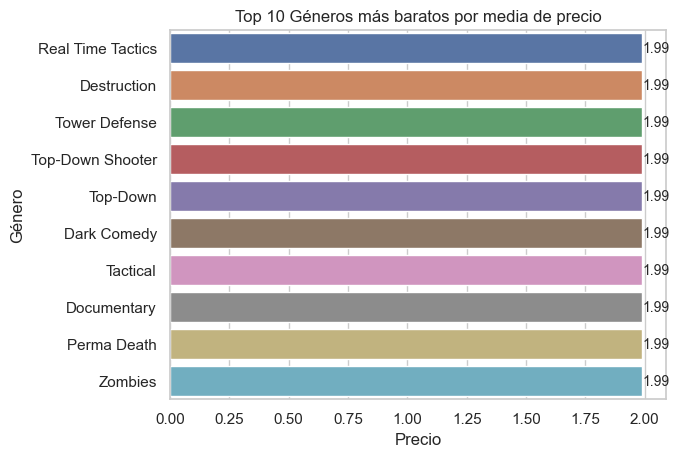

In [33]:
# Ahora analizamos los géneros más baratos
sns.barplot(data= df_genres_grouped_price.tail(10), x= 'price', y= 'genres')
for index, value in enumerate(df_genres_grouped_price.tail(10)['price']):
    plt.text(value, index, str(round(value,2)), ha='left', va='center', fontsize=10)

plt.title('Top 10 Géneros más baratos por media de precio')
plt.xlabel('Precio')
plt.ylabel('Género')

plt.show()

In [34]:
df_genres.head()

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date,Año
0,Action,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04,2018
1,Casual,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04,2018
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04,2018
3,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04,2018
4,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0,Kotoshiro,2018-01-04,2018


In [35]:
df_genres_grouped_year = df_genres.groupby(['genres', 'Año']).agg({'id': 'count'}).reset_index().rename(columns={'id': 'Cantidad'})
df_genres_grouped_year.head(10)

,genres,Año,Cantidad
0,1990's,2011,2
1,1990's,2012,1
2,2D,2010,5
3,2D,2011,2
4,2D,2012,5
5,2D,2017,1
6,3D Platformer,2010,1
7,3D Platformer,2011,1
8,3D Platformer,2012,1
9,Accounting,2015,2


In [36]:
generos_mas_frec = df_genres_frec['genres'].head(10).tolist()

<Axes: xlabel='Año', ylabel='Cantidad'>

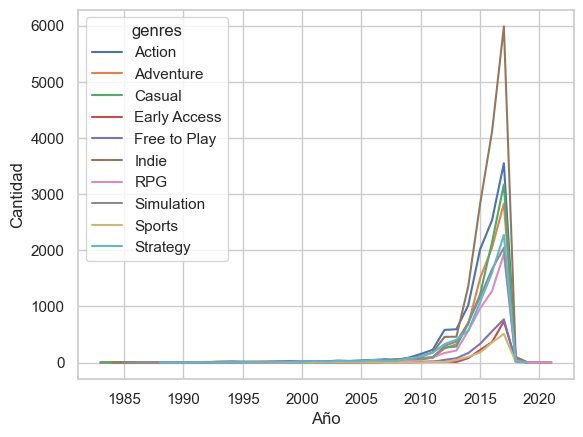

In [37]:
# en la siguiente gráfica vemos como crecieron los géneros más frecuentes en el tiempo
sns.lineplot(data=df_genres_grouped_year[df_genres_grouped_year['genres'].isin(generos_mas_frec)], 
             x='Año', y='Cantidad', hue='genres')

## Análisis de los nombres de los juegos

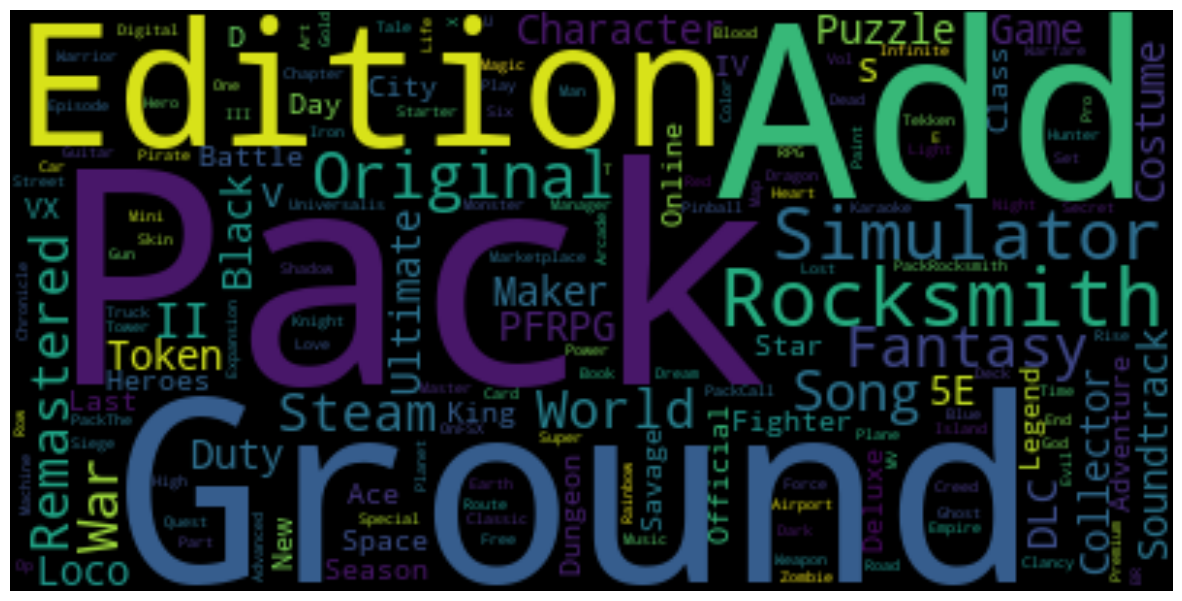

In [38]:
text = ''.join([df_steam.loc[i, 'app_name'] for i in range(len(df_steam))])
wordcloud = WordCloud(collocations=False, background_color='black').generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Análisis del archivo User Reviews

In [39]:
df_reviews = pd.read_parquet('CleanData/reviews.parquet')
df_reviews.head()

,user_id,review,item_id,recommend,Año
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,1,2011
1,76561197970982479,It's unique and worth a playthrough.,22200,1,2011
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,1,2011
3,js41637,I know what you think when you see this title ...,251610,1,2014
4,js41637,For a simple (it's actually not all that simpl...,227300,1,2013


In [100]:
# obtengamos los nombres e id de items en un solo dataframe
df_names = df_steam[['id', 'app_name']].drop_duplicates()
df_names.columns = ['item_id', 'item_name']
df_names.head()

,item_id,item_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,772540,Battle Royale Trainer


In [96]:
df_items = pd.read_parquet('CleanData/users_items.parquet')
df_items.head()

,user_id,playtime_forever,playtime_2weeks,item_id,item_name
0,76561197970982479,6,0,10,Counter-Strike
1,76561197970982479,0,0,20,Team Fortress Classic
2,76561197970982479,7,0,30,Day of Defeat
3,76561197970982479,0,0,40,Deathmatch Classic
4,76561197970982479,0,0,50,Half-Life: Opposing Force


In [97]:
df_names_2 = df_items[['item_id', 'item_name']].drop_duplicates()
df_names_2.head()

,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force


In [101]:
df_names = pd.concat([df_names, df_names_2], axis=0)
df_names.head()

,item_id,item_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,772540,Battle Royale Trainer


In [103]:
df_names.drop_duplicates(subset='item_id', inplace=True)

In [110]:
len(df_names)

31220

In [111]:
#df_names.to_parquet('Recommender System/item_names.parquet')

In [104]:
df_rev_grouped = df_reviews.groupby(['item_id', 'Año']).agg({'recommend': ['sum', 'count']}).reset_index()
df_rev_grouped.columns = ['item_id', 'Año', 'Recomendaciones', 'Reviews totales']
df_rev_grouped['% de recomendación'] = round(df_rev_grouped['Recomendaciones'] * 100 / df_rev_grouped['Reviews totales'], 2)
df_rev_grouped = df_rev_grouped.merge(df_names, how='left')
df_rev_grouped.head()

,item_id,Año,Recomendaciones,Reviews totales,% de recomendación,item_name
0,10,2011,1,1,100.00,Counter-Strike
1,10,2012,3,3,100.00,Counter-Strike
2,10,2013,7,7,100.00,Counter-Strike
3,10,2014,28,28,100.00,Counter-Strike
4,10,2015,16,17,94.12,Counter-Strike


In [105]:
df_rev_grouped.isna().sum()

item_id                 0
Año                     0
Recomendaciones         0
Reviews totales         0
% de recomendación      0
item_name             123
dtype: int64

In [106]:
df_rev_grouped_2 = df_rev_grouped.groupby(['item_id', 'item_name']).agg({'Recomendaciones': 'sum', 'Reviews totales': 'sum'}).reset_index()
df_rev_grouped_2['% de recomendación'] = round(df_rev_grouped_2['Recomendaciones'] * 100 / df_rev_grouped_2['Reviews totales'], 2)
df_rev_grouped_2.head()

,item_id,item_name,Recomendaciones,Reviews totales,% de recomendación
0,10,Counter-Strike,55,56,98.21
1,20,Team Fortress Classic,11,17,64.71
2,30,Day of Defeat,3,4,75.00
3,40,Deathmatch Classic,1,1,100.00
4,50,Half-Life: Opposing Force,3,4,75.00


In [107]:
# veamos cuales son los items más recomendados:
df_rev_grouped_2.sort_values(by= 'Recomendaciones', ascending=False).head(10)

,item_id,item_name,Recomendaciones,Reviews totales,% de recomendación
19,440,Team Fortress 2,3571,3694,96.67
24,730,Counter-Strike: Global Offensive,3429,3708,92.48
82,4000,Garry's Mod,1657,1704,97.24
2177,304930,Unturned,943,1031,91.46
1012,218620,PAYDAY 2,892,1113,80.14
21,550,Left 4 Dead 2,722,743,97.17
707,105600,Terraria,711,729,97.53
1521,252490,Rust,695,806,86.23
635,72850,The Elder Scrolls V: Skyrim,669,710,94.23
1053,221100,DayZ,567,729,77.78


In [91]:
df_rev_grouped_2.isna().sum()

item_id               0
item_name             0
Recomendaciones       0
Reviews totales       0
% de recomendación    0
dtype: int64

<Axes: xlabel='Recomendaciones', ylabel='item_name'>

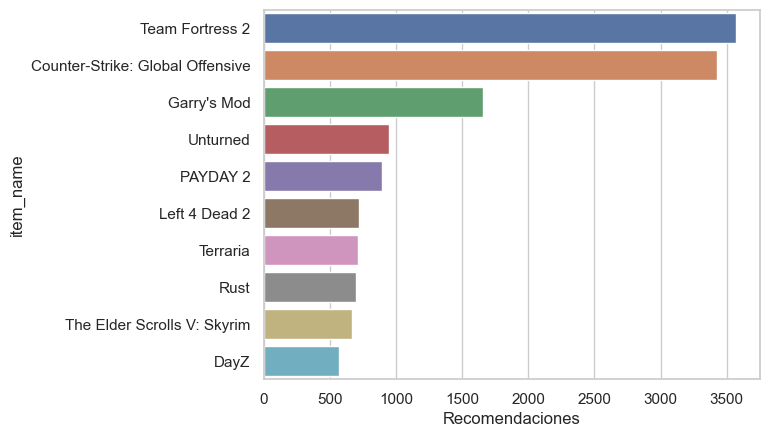

In [92]:
# los juegos más recomendados son:
sns.barplot(data=df_rev_grouped_2.sort_values(by= 'Recomendaciones', ascending=False).head(10),
            x= 'Recomendaciones', y= 'item_name' )

<Axes: xlabel='% de recomendación', ylabel='item_name'>

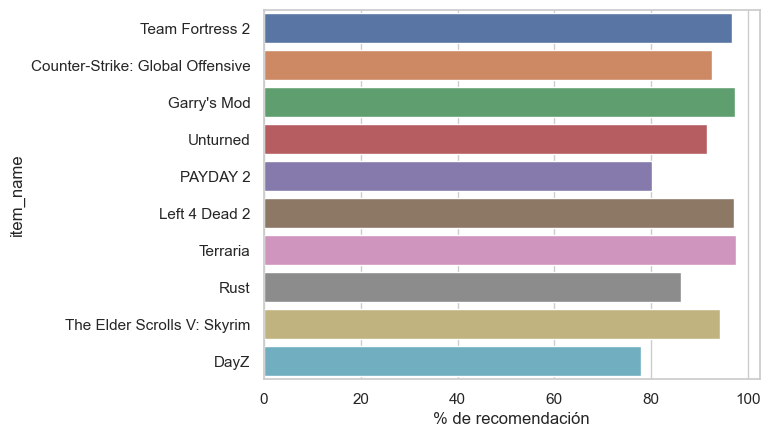

In [95]:
# de los juegos anteriores, veamos cómo cambia el porcentaje de recomendación:
sns.barplot(data=df_rev_grouped_2.sort_values(by= 'Recomendaciones', ascending=False).head(10),
            x= '% de recomendación', y= 'item_name' )

In [112]:
df_rev_grouped_2.sort_values(by= 'Recomendaciones', ascending=False, inplace=True)

In [124]:
# guardemos en una variable los id de los juegos más recomendados
id_más_recomendados = df_rev_grouped_2.iloc[:10,0].tolist()

<Axes: xlabel='Año', ylabel='Recomendaciones'>

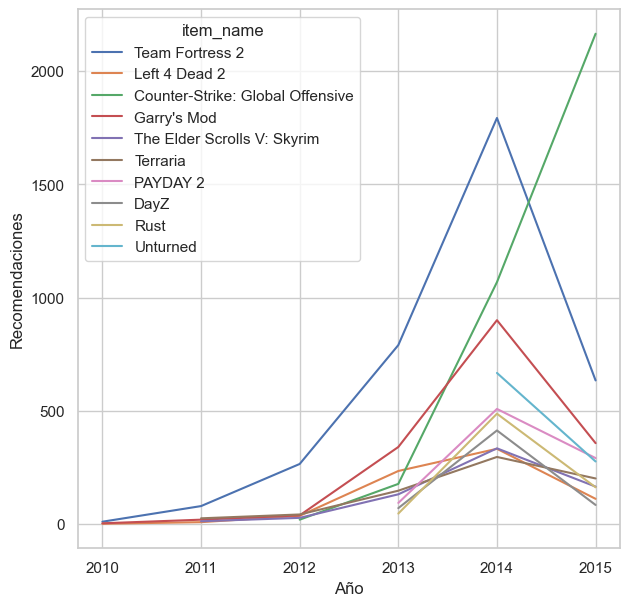

In [130]:
# veamos como cambiaron las recomendaciones en el tiempo:
plt.figure(figsize=(7,7))
sns.lineplot(data=df_rev_grouped[df_rev_grouped['item_id'].isin(id_más_recomendados)],
             x= 'Año', y= 'Recomendaciones', hue= 'item_name')